# Connect Intensive - Machine Learning Nanodegree

## Week 8. Feature Selection

### Objectives    

  - Define the Chi-Squared $(\chi^2)$ test statistic and Pearson's Chi-Squared Test
  - Perform univariate feature selection using the <a href="http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html">`SelectKBest` class</a> from `sklearn`.
  - Perform recursive feature elimination (RFE) using the <a href="http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html">`RFE` class</a> from `sklearn`.
  - Determine the optimal number of features to retain using RFE with cross-validation (RFECV) and the <a href="http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFECV.html">`RFECV` class</a> from `sklearn`.
  
### Prerequisites
  - [matplotlib](http://matplotlib.org/index.html)  
  - [numpy](http://www.scipy.org/scipylib/download.html)  
  - [pandas](http://pandas.pydata.org/getpandas.html)  
  - [sklearn](http://scikit-learn.org/stable/install.html)  
 

---

## 1 | Dataset  

The dataset for this exercise is the [Mushroom Dataset](https://archive.ics.uci.edu/ml/datasets/Mushroom) from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/index.html). The dataset is drawn from **The Audubon Society Field Guide to North American Mushrooms** *(1981)*. There are 8124 instances in the dataset and 22 categorical features that can be used to predict whether a mushroom is edible or poisonous. 

Below is the information about the dataset from UCI Machine Learning Repository:  
> *"This data set includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family (pp. 500-525). Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. This latter class was combined with the poisonous one. The Guide clearly states that there is no simple rule for determining the edibility of a mushroom; no rule like "leaflets three, let it be" for Poisonous Oak and Ivy."*

The first column in the dataset, **`edible`**, is the target variable, describing whether a mushroom is (e)dible or (p)oisonous.

The remaining 22 columns in the dataset correspond to 22 features:
  1. **`cap-shape`:** bell=b, conical=c, convex=x, flat=f, knobbed=k, sunken=s
  2. **`cap-surface`:** fibrous=f, grooves=g, scaly=y, smooth=s
  3. **`cap-color`:** brown=n, buff=b, cinnamon=c, gray=g, green=r, pink=p, purple=u, red=e, white=w, yellow=y
  4. **`bruises`:** bruises=t, no=f
  5. **`odor`:** almond=a, anise=l, creosote=c, fishy=y, foul=f, musty=m, none=n, pungent=p, spicy=s
  6. **`gill-attachment`:** attached=a, descending=d, free=f, notched=n
  7. **`gill-spacing`:** close=c, crowded=w, distant=d
  8. **`gill-size`:** broad=b, narrow=n
  9. **`gill-color`:** black=k, brown=n, buff=b, chocolate=h, gray=g, green=r, orange=o, pink=p, purple=u, red=e, white=w, yellow=y
  10. **`stalk-shape`:** enlarging=e, tapering=t
  11. **`stalk-root`:** bulbous=b, club=c, cup=u, equal=e, rhizomorphs=z, rooted=r, missing=?
  12. **`stalk-surface-above-ring`:** fibrous=f, scaly=y, silky=k, smooth=s
  13. **`stalk-surface-below-ring`:** fibrous=f, scaly=y, silky=k, smooth=s
  14. **`stalk-color-above-ring`:** brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y
  15. **`stalk-color-below-ring`:** brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y
  16. **`veil-type`:** partial=p, universal=u
  17. **`veil-color`:** brown=n, orange=o, white=w, yellow=y
  18. **`ring-number`:** none=n, one=o, two=t
  19. **`ring-type`:** cobwebby=c, evanescent=e, flaring=f, large=l, none=n, pendant=p, sheathing=s, zone=z
  20. **`spore-print-color`:** black=k, brown=n, buff=b, chocolate=h, green=r, orange=o, purple=u, white=w, yellow=y
  21. **`population`:** abundant=a, clustered=c, numerous=n,scattered=s, several=v, solitary=y
  22. **`habitat`:** grasses=g, leaves=l, meadows=m, paths=p, urban=u, waste=w, woods=d


In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from IPython.display import display

In [2]:
# read the data
url = 'http://mlr.cs.umass.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data'
feature_names = ['edible', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment','gill-spacing', \
                 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root','stalk-surface-above-ring', \
                 'stalk-surface-below-ring', 'stalk-color-above-ring','stalk-color-below-ring', 'veil-type', \
                 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat']
df = pd.read_csv(url, names=feature_names, header=None)
display(df.head())

,edible,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


> **Note:** There are 22 categorical features in the dataset, if we perform one-hot-encoding for each of the categorical features using either [`pandas.get_dummies()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html) or [`sklearn.preprocessing.OneHotEncoder()`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html), there will be even more features to choose from, leading to the curse of dimensionality. Therefore, we need to apply some techniques to reduce the dimensionality of the problem. 

## 2 | Contingency Tables and Pearson's Chi-Squared Test

Chi-Squared test is a way of determining the predictive power for a given feature, i.e., how likely are two features to be independent. 

Let's demonstrate it with a simpler example. Suppose we have a collection 100 mushrooms. 50 mushrooms have bruises, and 50 do not. Also, 50 mushrooms are `edible` (**e**) and 50 are `poisonous` (**p**). A [**contingency table**](https://en.wikipedia.org/wiki/Contingency_table) (also known as a **cross tabulation** or **crosstab**) is a matrix that displays the *multivariate* frequency distribution of the variables. Below is one possible **observed** contingency table:

| `edible`  | **e** | **p** | 
|-------------|-------|-------| 
| `bruises` |       |       |
| **f**       |    20 |    30 | 
| **t**       |    30 |    20 |

The columns of this contingency table correspond to (**e**) and (**p**) mushrooms, respectively. The rows correspond to the absence (**f**) or presence (**t**) of bruises on the mushroom, respectively. In this example, there are 20 edible mushrooms without bruises and 30 edible mushrooms with bruises. There are 30 poisonous mushrooms without bruises and 20 poisonous mushrooms with bruises.

The question we are interested in answering is, based on the observed contingency table, are these two features (edible and bruises) *independent*? [Pearson's Chi-Squared Test](https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test) can be used to predict the likelihood that two features are independent. First, we need to compute the **expected** (or **theoretical**) contingency table for independent features. For example, what frequency of edible mushrooms with bruises would we expect from a set of 100 mushrooms where 50 are edible and 50 have bruises? We could compute this as follows:

$$ \begin{array}{c}\text{Theoretical}\\\text{frequency of}\\\text{edible mushrooms}\\\text{with bruises}\end{array} = \left(\begin{array}{c}\text{Probability of}\\\text{mushroom being}\\\text{edible}\end{array}\right) \times \left(\begin{array}{c}\text{Probability of}\\\text{mushroom having}\\\text{bruises}\end{array}\right) \times
\left(\begin{array}{c}\text{Total}\\\text{number of}\\\text{mushrooms}\end{array}\right)=\left(\frac{50}{100}\right)\left(\frac{50}{100}\right)\left(\vphantom{\frac{50}{100}}100\right)={\ 25\ }$$

We can repeat this calculation for each entry in the contingency table to obtain the  **expected** (or **theoretical**) contingency table:

| **edible**  | **e** | **p** | 
|-------------|-------|-------| 
| **bruises** |       |       |
| **f**       |    25 |    25 | 
| **t**       |    25 |    25 |

Now that we have the observed and expected frequencies, we can compute $\chi^2$ test statistic:

$$\boxed{\chi^2=\sum_{i=1}^n\frac{\left(E_i-O_i\right)^2}{E_i}}$$

where the meanings of symbols are shown below:  

  - $\chi^2$ is Pearson's cumulative test statistic, which asymptotically approaches a [$\chi^2$ distribution](https://en.wikipedia.org/wiki/Chi-squared_distribution)
  - $n$ is the number of cells in the contingency table (in our example, $n=4$)
  - $E_i$ is the **expected** (or **theoretical**) frequency for the $i^{\text{th}}$ cell of the contingency table.
  - $O_i$ is the **observed** (or **actual**) frequency for the $i^{\text{th}}$ cell of the contingency table.
  
The value of our $\chi^2$ test statistic is computed as follows:

$$\chi^2=\frac{\left(25-20\right)^2}{25}+\frac{\left(25-30\right)^2}{25}+\frac{\left(25-30\right)^2}{25}+\frac{\left(25-20\right)^2}{25}=4$$

To determine whether a $\chi^2$ test statistic is statistically significant, we will also need to compute the <a href="https://en.wikipedia.org/wiki/Degrees_of_freedom_(statistics)">**degrees of freedom**</a> (DoF). For a feature with $N$ distinct classes, there are $N-1$ DoF. For example, there are 2 classes for the `bruises` feature: **t** or **f**, and hence only 1 DoF. To get the total DoF from multiple features, simply **multiply** the DoF for each feature: in our example, there is 1 DoF from the `bruises` feature and 1 DoF from the `edible` feature. The total DoF is simply $1\times1=1$.

Now we can compute the <a href="https://en.wikipedia.org/wiki/P-value">**p-value**</a> of the test statistic $\chi^2=4$ with 1 DoF, which is equal to 1 minus the **cumulative distribution function** ([`chi2.cdf` from the `scipy` package](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2.html)). The code is shown below: 

In [3]:
# compute p-value for the test statistic
from scipy.stats import chi2 as stats_chi2
print 'The p value with chi-squared of {:.2f} and {} DoF is {:.3f}'.format(4, 1, 1-stats_chi2.cdf(4, 1))

The p value with chi-squared of 4.00 and 1 DoF is 0.046


#### QUESTION
How do you interpret the p-value? 

**Answer:** There is a 4.6% chance of observing a `bruises` and `edible` contingency table deviating at least as far from the expected contingency table as the one above, given the null hypothesis that the two features are independent. 

The larger the $\chi^2$ test-statistic is for a contingency table, the lower the resulting p-value and the less likely that two features are independent. However, the critical $\chi^2$ test-statistic is dependent on the DoF. We can visualize the $\chi^2$ distribution for different DoF.

/Users/yanfeiwu/anaconda/envs/mlnd/lib/python2.7/site-packages/ipykernel/__main__.py:5: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.


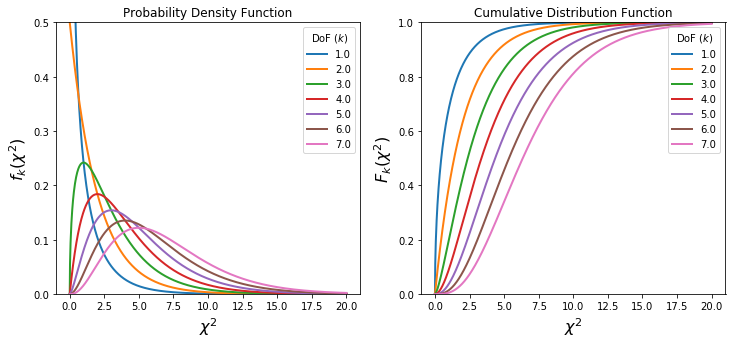

In [4]:
# plot the chi-square distribution for different DoF
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# plot the pdf and cdf for the chi2 distribution for several DoF:
x = np.linspace(0.0, 20.0, 1e3)
for dof in np.arange(1.0, 8.0):
    # probability density function on first axis
    ax[0].plot(x, stats_chi2.pdf(x, dof), label=dof, lw=2)
    # cumulative distribution function on second axis:
    ax[1].plot(x, stats_chi2.cdf(x, dof), label=dof, lw=2)
    
# set the y limits for each axis separately
ylim = ax[0].set_ylim([0, 0.5])
ylim = ax[1].set_ylim([0, 1])

# Add a legend to each axis showing the DoF
ax[0].legend(title='DoF ($k$)')
ax[1].legend(title='DoF ($k$)')

# Set the title and axes labels for each axis
ax[0].set_title('Probability Density Function')
ax[1].set_title('Cumulative Distribution Function')
ax[0].set_xlabel('$\chi^2$', fontsize=16)
ax[1].set_xlabel('$\chi^2$', fontsize=16)
ax[0].set_ylabel('$f_k(\chi^2)$', fontsize=16)
ax[1].set_ylabel('$F_k(\chi^2)$', fontsize=16)

As shown above, the probability density function (pdf) for the $\chi^2$ distribution broadens and flattens as we increase the DoF, meaning larger $\chi^2$ test-statistics become more common with increasing DoF.

## 3 | Chi-Squared Test with `pandas`

We can perform the statistical analysis explained above using `pandas`. First, let's make a contingency table from the Mushroom dataset for the `'bruises'` and `'edible'` features, using [`pandas.crosstab()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.crosstab.html).

In [5]:
# make a contingency table
bruises_obs = pd.crosstab(df['bruises'], df['edible'])
print 'Observed Frequencies:'
display(bruises_obs)

Observed Frequencies:


edible,e,p
bruises,,
f,1456,3292
t,2752,624


This is the **observed** contingency table. We also need the **expected** frequency, assuming the `'bruised'` and `'edible'` features are independent. We can do this using an [outer product](https://docs.scipy.org/doc/numpy/reference/generated/numpy.outer.html) of two `numpy` arrays: the `'bruises'` frequencies and the `'edible'` frequencies, normalized by the total number of observations. 

In [6]:
bruises_exp = pd.DataFrame(np.outer(bruises_obs.sum(axis=1), bruises_obs.sum(axis=0))*1.0 / bruises_obs.sum().sum(),\
                            index = bruises_obs.index, columns = bruises_obs.columns)
print 'Expected Frequencies (assuming feature independence):'
display(bruises_exp.round(0))

Expected Frequencies (assuming feature independence):


edible,e,p
bruises,,
f,2459.0,2289.0
t,1749.0,1627.0


In [7]:
# compute chi-square
bruises_chi2 = ((bruises_exp - bruises_obs).apply(lambda x: x**2) / bruises_exp).sum().sum()
print 'The chi2 test-statistic is {:.2f}.'.format(bruises_chi2)
print 'The p-value for this chi2 is {:.4e}.'.format(1-stats_chi2.cdf(bruises_chi2, df=1))

The chi2 test-statistic is 2043.45.
The p-value for this chi2 is 0.0000e+00.


The p-value, or the likelihood of `'edible'` and `'bruises'` being independent features, is practically zero. It's very unlikely that the features are independent, and so there's likely useful predictive power in the `'bruises'` feature. But is it the feature with the *most* predictive power? We'll see in the next section how `sklearn` can use the $\chi^2$ test statistic to determine the most useful features to retain. 

#### QUESTIONS 

**Q1:** Make a contingency table using `pandas.crosstab()` for the `'stalk-shape'` and `'edible'` features, and store the resulting `DataFrame` object into the variable `stalk_obs`. The `'stalk-shape'` feature has two categories: (**e**)nlarging and (**t**)apering. How many (**p**)oisonous mushrooms have an (**e**)nlarging stalk shape? How many (**e**)dible mushrooms have a (**t**)apering stalk shape? 

**Answer:** 

In [8]:
stalk_obs = pd.crosstab(df['stalk-shape'], df['edible'])
print 'Observed Frequencies:'
display(stalk_obs)

Observed Frequencies:


edible,e,p
stalk-shape,,
e,1616,1900
t,2592,2016


**Q2:** Based on the contingency table `stalk_obs` above, 
  - What does `stalk_obs.sum(axis=0)` compute?
  - What does `stalk_obs.sum(axis=1)` compute?
  - What does `stalk_obs.sum().sum()` compute?  

**Answer:** 

In [9]:
print '.sum(axis=0):'
display(stalk_obs.sum(axis=0))
print '\n.sum(axis=1):'
display(stalk_obs.sum(axis=1))
print '\n.sum().sum():'
display(stalk_obs.sum().sum())

.sum(axis=0):


edible
e    4208
p    3916
dtype: int64


.sum(axis=1):


stalk-shape
e    3516
t    4608
dtype: int64


.sum().sum():


8124

**Q3:** Create a table of the expected frequencies, given the assumption that the features `'stalk-shape'` and `'edible'` are independent. Store the result in the variable `stalk_exp`.  

**Answer:**. 

In [10]:
stalk_exp = pd.DataFrame(np.outer(stalk_obs.sum(axis=1),stalk_obs.sum(axis=0))*1.0 / stalk_obs.sum().sum(),\
                            index = stalk_obs.index, columns = stalk_obs.columns)
print 'Expected Frequencies (assuming feature independence):'
display(stalk_exp.round(0))

Expected Frequencies (assuming feature independence):


edible,e,p
stalk-shape,,
e,1821.0,1695.0
t,2387.0,2221.0


**Q4:** Based on the contingency table `stalk_exp` above, 
  - What does `stalk_exp.sum(axis=0)` compute?
  - What does `stalk_exp.sum(axis=1)` compute?
  - What does `stalk_exp.sum().sum()` compute?
  
Compare these results to those from question 2. Are the **values** the same? Are the **data types** (`dtype`) the same?

**Answer:** 

In [11]:
print '.sum(axis=0):'
display(stalk_exp.sum(axis=0))
print '\n.sum(axis=1):'
display(stalk_exp.sum(axis=1))
print '\n.sum().sum():'
display(stalk_exp.sum().sum())

.sum(axis=0):


edible
e    4208.0
p    3916.0
dtype: float64


.sum(axis=1):


stalk-shape
e    3516.0
t    4608.0
dtype: float64


.sum().sum():


8124.0

**Q5:** Compute $\chi^2$ for the two features `'stalk-shape'` and `'edible'`.

The $\chi^2$ test-statistic for the two features `'bruises'` and `'edible'` was 2043.45. How does the $\chi^2$ test-statistic for the two features `'stalk-shape'` and `'edible'` compare? Can we compare these two $\chi^2$ test-statistics directly with one another?  

**Answer:** 

In [12]:
stalk_chi2 = ((stalk_exp - stalk_obs).apply(lambda x: x**2) / stalk_exp).sum().sum()
print 'The chi2 test-statistic is {:.2f}.'.format(stalk_chi2)

The chi2 test-statistic is 84.55.


## 4 | Univariate feature selection: `SelectKBest`  


One implication of the [curse of dimensionality](https://en.wikipedia.org/wiki/Curse_of_dimensionality) is that it's useful to reduce the dimensionality of sample sets, either to improve estimators’ accuracy scores or to boost their performance on very high-dimensional datasets. [The `feature_selection` module](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.feature_selection) in `sklearn` includes **univariate** filter selection methods, including the [`SelectKBest` class](http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html). **Univariate** means that each feature is considered **independently**.

In order to use `SelectKBest` to reduce the dimensionality of our mushroom data set, we first need to do some preprocessing to ensure that the `sklearn` methods can make predictions. Recall that `sklearn` requires numeric features, and we can use `pandas` method [`get_dummies()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html) to convert the categorical features into numeric variables. Each feature with $n$ distinct classes will become $n$ different numeric variables.

In [13]:
X = df.drop(['edible'], axis=1)
y = df['edible']
X = pd.get_dummies(X)
print 'There are now {} predictive features to choose from.'.format(len(X.columns))

There are now 117 predictive features to choose from.


The first parameter for `SelectKBest` is a callable, `score_func`, which must take two arrays, X and y, as inputs, and return either an array (of scores) or a pair of arrays (of scores and p-values). There will be one score for each feature in the X array. The `sklearn` [user guide for univariate feature selection](http://scikit-learn.org/stable/modules/feature_selection.html#univariate-feature-selection) lists some possible callables for `score_func`:

  - For **regression** problems: [f_regression](http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_regression.html), [mutual_info_regression](scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_regression.html)
  - For **classification** problems: [chi2](scikit-learn.org/stable/modules/generated/sklearn.feature_selection.chi2.html), [f_classif](http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_classif.html), [mutual_info_classif](http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_classif.html)
  
Let's use `chi2` for this dataset.

In [14]:
from sklearn.feature_selection import chi2
chi2_vals, p_vals = chi2(X[['bruises_f','bruises_t']], y)
display(chi2_vals)

array([  849.17446091,  1194.27735201])

We get two $\chi^2$ test statistic contributions, one for the `'bruises_f'` feature and one for the `'bruises_t'` feature. Let's revisit our manual computation of the $\chi^2$ test-statistic. We used the formula:

$$\chi^2=\sum_{i=1}^n\frac{\left(E_i-O_i\right)^2}{E_i}$$

where the summation was over *all cells* in the contingency table. We performed the summation over all cells with `.sum().sum()`. What if we only add up the contributions to $\chi^2$ *row-wise*, with `.sum(axis=1)`? 

In [15]:
((bruises_exp - bruises_obs).apply(lambda x: x**2) / bruises_exp).sum(axis=1)

bruises
f     849.174461
t    1194.277352
dtype: float64

Adding row-wise, we get the same result for $\chi^2$ as we do from the `sklearn` `chi2` callable. We also see that the contribution to $\chi^2$ is greater from the mushrooms with bruises than from those without.

The idea behind `SelectKBest` is that **the larger the $\chi^2$ test-statistic is for a given feature, the more predictive power that feature has**. So we'll only keep the $k$ features with the largest $\chi^2$ test-statistics.

**Run** the cell below to print the top $k$ features with the largest $\chi^2$ statistics, in descending order. We'll compare this list to the features selected from `SelectKBest()`

In [16]:
# set a value for k
k = 10

# use the chi2 callable to compute the chi2_vals and p_vals
chi2_vals, p_vals = chi2(X, y)

# use argsort()[-k:] to get the indices of the last k sorted chi2_values
# use [::-1] to reverse the array (chi2 in descending order).
for feature in X.columns[chi2_vals.argsort()[-k:][::-1]]:
    print feature

odor_n
odor_f
stalk-surface-above-ring_k
stalk-surface-below-ring_k
gill-color_b
gill-size_n
spore-print-color_h
ring-type_l
ring-type_p
bruises_t


In [17]:
# use SelectKBest
from time import time
from sklearn.feature_selection import SelectKBest

print 'Selecting the {} best features using SelectKBest:'.format(k)

# keep track of elapsed time to determine the k best features with the chi2 score_func
t0 = time()

# create a SelectKBest() object, top_feat, with chi2 as score_func
top_feat = SelectKBest(chi2, k)

# fit top_feat to data, then transform it
X_kbest = top_feat.fit_transform(X, y)

# print out the elapsed time 
print 'done in {:0.3f}s\n'.format(time() - t0)

# print the number of features remaining after calling SelectKBest
print 'There are {} features after calling SelectKBest:'.format(X_kbest.shape[1])

# top_feat is already fit to the data, so use it to get the column names of the k best features 
# (note, they will NOT be in descending order)
k_best_features = X.columns[top_feat.transform(np.arange(len(X.columns)).reshape(1,-1))][0]
for feature in k_best_features:
    print '  {}'.format(feature)

Selecting the 10 best features using SelectKBest:
done in 0.017s

There are 10 features after calling SelectKBest:
  bruises_t
  odor_f
  odor_n
  gill-size_n
  gill-color_b
  stalk-surface-above-ring_k
  stalk-surface-below-ring_k
  ring-type_l
  ring-type_p
  spore-print-color_h


We get the same $k$ features as we found above, but this time they appear in the same order as they do in the original `df` `DataFrame` object. Now we're free to build a model on this smaller data set, hopefully preserving the features with the greatest individual predictive power to determine whether or not a mushroom is edible. Let's use a `RandomForestClassifier` that predicts using only the $k$ best features. 

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# keep track of elapsed time to fit the RandomForest classifier on the k best features:
t0 = time()

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_kbest, y, test_size=0.20, random_state=42)

# create a RandomForest classifier with 10 trees in the forest
clf = RandomForestClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=42)

# fit the classifier on the training data
clf.fit(X_train,y_train)

# print out the elapsed time for fitting the classifier
print 'done in {:0.3f}s'.format(time() - t0)

# display the accuracy score on the test set
print 'test set accuracy: {:.2f}%'.format(accuracy_score(y_test,clf.predict(X_test))*100.0)

done in 0.034s
test set accuracy: 97.42%


## 5 | Recursive Feature Elimination

Univariate feature selection is one way to reduce the dimensionality of a dataset, but it has some shortcomings:
  - Features that are useful when combined would be ignored.
  - The particular instances or inputs that are correctly classified do not shape the feature selection process.

An alternative approach would be to use [**recursive feature elimination (RFE)**](http://scikit-learn.org/stable/modules/feature_selection.html#rfe). With RFE, an estimator is first trained on the initial set of features. During the training step, weights are assigned to each feature. Next, features whose absolute weights are the **smallest** are pruned from the set. The idea is that the feature with the smallest absolute weight would change the model the least if it were removed from the set of features. This procedure is repeated until the desired number of features is reached.

Let's take a look at the `sklearn` documentation for [`RFE`](http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html). Note that the `estimator` parameter must have a `coef_` attribute that, after fitting with the `fit` method, holds the fitted parameters. More important features must correspond to higher absolute values of `coef_`. But if we check the `RandomForestClassifier` documentation, there is no `coef_` attribute. However, there is a `feature_importances_` attribute that ranks the model features by importance. A simple adaptation, [a solution found on Stack Overflow](http://stackoverflow.com/questions/24123498/recursive-feature-elimination-on-random-forest-using-scikit-learn), shows how to make `RandomForestClassifier` compatible with `RFE`. 

**Run** the cell below to perform recursive feature elimination on the mushroom data set. 

In [19]:
from sklearn.feature_selection import RFE

# adapt the RandomForestClassifier class to be compatible with RFE:
class RandomForestClassifierWithCoef(RandomForestClassifier):
    def fit(self, *args, **kwargs):
        super(RandomForestClassifierWithCoef, self).fit(*args, **kwargs)
        # add the coef_ attribute, required for RFE:
        self.coef_ = self.feature_importances_

# number of features at which to cease RFE
n_feat = 10

# Number of features to remove at each step of RFE
step = 1

print 'Creating a Random Forest Classifier'
print '  RFE, removing {} feature(s) at a time, until reaching {} features.'.format(step, n_feat)

# keep track of elapsed time to recursively eliminate all but n_feat features:
t0 = time()

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# create a RandomForest classifier with 10 trees in the forest
clf = RandomForestClassifierWithCoef(n_estimators=10, max_depth=None, min_samples_split=2, random_state=42)

# create a RFE selector, using the Random Forest classifier as the estimator
selector = RFE(clf, n_features_to_select=n_feat, step=step)

# fit the RFE selector (this is the time-intensive step)
selector = selector.fit(X_train, y_train)

# Print out the elapsed time for RFE
print '  done in {:0.3f}s'.format(time() - t0)

Creating a Random Forest Classifier
  RFE, removing 1 feature(s) at a time, until reaching 10 features.
  done in 3.922s


As you can see, `RFE` is a bit slower than `SelectKBest()`, simply because `RFE` is more labor intensive. A `RandomForestClassifier` is built at every step, and only one feature is removed at every step. With over 110 features in the initial dataset, that means over 100 `RandomForestClassifier` estimators will be fit to the dataset, each comprising 10 decision trees. In contrast, `SelectKBest()` only needs to compute the value of $\chi^2$ for each feature once.

Let's see the final result. From the `RFE` object, we are using the `support_` attribute, which is a boolean array equal to `True` only at the indices of the remaining features.

In [20]:
# get the names of the features remaining after RFE
RFE_best_features = X.columns[selector.support_]

# print the remaining feature names:
for feature in RFE_best_features:
    print feature

bruises_t
odor_f
odor_n
gill-spacing_w
gill-size_b
gill-size_n
stalk-shape_t
stalk-surface-above-ring_k
ring-type_p
spore-print-color_w


In [21]:
# Display the accuracy score on the test set
print 'Test set accuracy: {:.2f}%'.format(accuracy_score(y_test, \
                                                         selector.estimator_.predict(X_test[RFE_best_features]))*100.0)

Test set accuracy: 99.94%


Finally, if we don't want to tell `RFE` how many features to prune, we can use the [`RFECV` class](http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFECV.html). It performs feature ranking with recursive feature elimination and cross-validated selection of the best number of features. 

In [22]:
from sklearn.feature_selection import RFECV

# number of features to remove at each step of RFE
step = 1

print 'Creating a Random Forest Classifier'
print '  RFECV, removing {} feature(s) at a time.'.format(step)

# keep track of elapsed time to recursively eliminate features:
t0 = time()

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# create a Random Forest classifier with 10 trees in the forest
clf = RandomForestClassifierWithCoef(n_estimators=10, max_depth=None, min_samples_split=2, random_state=42)

# create a RFECV selector
selector = RFECV(clf, step=step, cv=5, n_jobs=-1, scoring='accuracy')

# fit the RFE selector (this is the time-intensive step)
selector = selector.fit(X_train, y_train)

# print out the elapsed time for RFE
print '  done in {:0.3f}s'.format(time() - t0)

Creating a Random Forest Classifier
  RFECV, removing 1 feature(s) at a time.
  done in 5.660s


In [23]:
# get the number of features remaining after RFECV
print selector.n_features_

117


It seems that no features were removed! We can look into the `grid_scores_` attribute to see how well each of the numbers of features performed. 

**Run** the cell below to print and plot the cross-validation scores for each number of features retained. 

[ 0.88890697  0.88890697  0.96476437  0.97137976  0.97707349  0.9824581
  0.98630426  0.99245917  0.9956916   0.99861479  0.99923018  1.          1.
  1.          1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.          1.
  1.

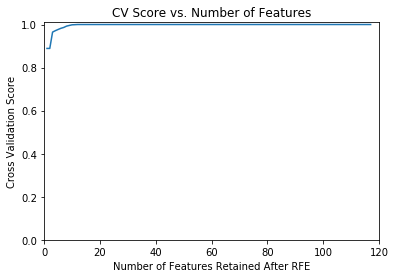

In [24]:
print selector.grid_scores_

# initialize figure and axes:
fig, ax = plt.subplots()
ax.plot(np.arange(len(selector.grid_scores_))+1, selector.grid_scores_)
xlim = ax.set_xlim([0, 120])
ylim = ax.set_ylim([0, 1.01])
xlab = ax.set_xlabel('Number of Features Retained After RFE')
ylab = ax.set_ylabel('Cross Validation Score')
titl = ax.set_title('CV Score vs. Number of Features')

The `RandomForestClassifier` works so well that every model containg from 12 features up to 117 features gets a perfect cross-validation score! Most prediction problems would not be able to achieve a perfect cross-validation score even once, but the mushroom data set is a little too well-behaved. Ideally, in the event of a cross-validation score tie, we would want `RFECV` (a tool used for dimensionality reduction) to select the *fewest* number of features, and not the greatest. 

Looking at the `grid_scores_` attribute, we can prune the dataset down to 13 features and still get optimal predictive power. Let's confirm that the accuracy scores on both the training and testing sets are optimal.

In [26]:
# number of features at which to cease RFE
n_feat = 13

# number of features to remove at each step of RFE
step = 1

print 'Creating a Random Forest Classifier'
print '  RFE, removing {} feature(s) at a time, until reaching {} features.'.format(step,n_feat)

# keep track of elapsed time to recursively eliminate all but n_feat features:
t0 = time()

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# create a Random Forest classifier with 10 trees in the forest
clf = RandomForestClassifierWithCoef(n_estimators=10, max_depth=None, min_samples_split=2, random_state=42)

# create a RFE selector, using the RandomForest classifier as the estimator
selector = RFE(clf, n_features_to_select=n_feat, step=step)

# fit the RFE selector (this is the time-intensive step)
selector = selector.fit(X_train, y_train)

# Print out the elapsed time for RFE
print '  done in {:0.3f}s'.format(time() - t0)

# get the names of the features remaining after RFE
RFE_best_features = X.columns[selector.support_]

# display the accuracy score on the test set
print 'Training set accuracy: {:.2f}%'.format(accuracy_score(y_train, \
                                                             selector.estimator_.predict(X_train[RFE_best_features]))*100.0)

# Display the accuracy score on the test set
print 'Testing set accuracy: {:.2f}%'.format(accuracy_score(y_test, \
                                                            selector.estimator_.predict(X_test[RFE_best_features]))*100.0)

Creating a Random Forest Classifier
  RFE, removing 1 feature(s) at a time, until reaching 13 features.
  done in 3.860s
Training set accuracy: 100.00%
Testing set accuracy: 100.00%


## 6 | Summary

1. **univariate feature selection** and `SelectKBest()`    
    - Univariate feature selection seems to be a computationally inexpensive way to pare down the dimensionality of a data set, but at the expense of missing out on features that work well in tandem. 
    - We need a score function to determine the predictive power of each feature. For classification problems, the **Chi-Squared** $(\chi^2)$ test statistic can be used as a score function for `SelectKBest()`. As the value of $\chi^2$ increases for a pair of features, it becomes less likely that the two features are independent.

2. **recursive feature elimination**: `RFE()` and `RFECV()`  
    - With `RFE`, we need to have *a priori* the number of features to retain for the final model. RFE is a bit more computationally expensive than univariate feature selection. But RFE generally yields better results than univariate feature selection for the same number of features, because RFE can capture more complex relationships.   
    - With `RFECV`, cross-validation scores are used to rank each number of features, and the final model will have a number of features that maximizes the cross-validation score.   
    - We saw that it's important that the fit estimator have some `coef_` attribute that contains a value for each feature, increasing with increasing feature importance. 

In addition to feature selection, you may also use **feature transformation** to reduce the dimensionality of a dataset, including Principal Component Analysis (PCA) which we discussed in last session.